***Task 3***

**Step 1**

Read the data from penguins  database

In [35]:
import sqlite3
import pandas as pd

# Connect to penguins database
conn = sqlite3.connect("data/penguins.db")

#Read the data/ we are selecting all columns from Penguins table 
query = 'SELECT * FROM Penguins'
df = pd.read_sql(query, conn)

#Closing connection
conn.close()

# See the data 
df.head()


,animal_id,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_id
0,1,Adelie,39.1,18.7,181.0,3750.0,Male,1
1,2,Adelie,39.5,17.4,186.0,3800.0,Female,1
2,3,Adelie,40.3,18.0,195.0,3250.0,Female,1
3,4,Adelie,36.7,19.3,193.0,3450.0,Female,1
4,5,Adelie,39.3,20.6,190.0,3650.0,Male,1


**Step 2**

Feature selcetion: To see which features we should choose for training, we used a correlation matrix

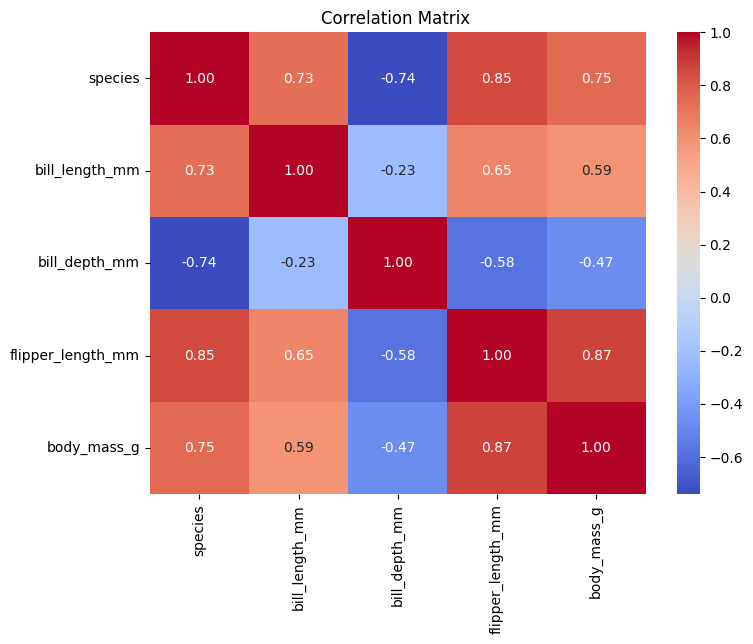

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop id columns and sex
df_corr = df.drop(columns=['animal_id', 'island_id','sex'])

# Convert species to numeric/ species is encoded (0 = Adelie, 1 = Chinstrap, 2 = Gentoo)
df_corr['species'] = df_corr['species'].astype('category').cat.codes

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix ")
plt.show()

Interpretation:

-flipper_length_mm (0.85) and body_mass_g (0.75) are positively correlated, meaning larger penguins are more likely Gentoo, while smaller ones are likely Adelie

-bill_depth_mm (-0.74) is negatively correlated, showing that deeper bills are more common in Adelie

-bill_length_mm (0.73) suggests that longer bills are more common in Gentoo.

In [37]:
df_corr.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,39.1,18.7,181.0,3750.0
1,0,39.5,17.4,186.0,3800.0
2,0,40.3,18.0,195.0,3250.0
3,0,36.7,19.3,193.0,3450.0
4,0,39.3,20.6,190.0,3650.0


**Preprocessing**

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[features]

In [41]:
# Standardize numerical features to have mean=0 and std=1 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [42]:
# Encode species into numbers 
y = df['species']
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [43]:
# Save the label encoder along with the model
joblib.dump(labelencoder_y, "models/label_encoder.pkl")

['models/label_encoder.pkl']

**Split test/train**

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

**Logistic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class="ovr") # since we have 3 classes
model.fit(X_train, y_train)


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [46]:
model.score(X_train, y_train)

0.9887218045112782

**Score interpretation**

In [47]:
# Convert numeric labels back to original species names
true_penguins = labelencoder_y.inverse_transform(y_train)

predicted_penguins = labelencoder_y.inverse_transform(model.predict(X_train))

In [48]:
df = pd.DataFrame({'true_penguins': true_penguins, 'predicted_penguins': predicted_penguins})

pd.crosstab(df.true_penguins, df.predicted_penguins)

predicted_penguins,Adelie,Chinstrap,Gentoo
true_penguins,,,
Adelie,117,0,0
Chinstrap,3,52,0
Gentoo,0,0,94


The model performs very well overall, with perfect predictions for Adelie and Gentoo.
For Chinstrap, it misclassified 3 as Adelie, but still achieved 93% recall on that class (52/56 correct).

**Save the model**

In [49]:
import joblib
joblib.dump(model, 'models/penguin_logreg_model.pkl')


['models/penguin_logreg_model.pkl']